In [1]:
"""
Created on Mon Jul 19 16:23:45 2021
Changed by Rafael L. da Silva, Sep 30th, 2021.

@author: Sanjana
"""

import cv2
import os
from matplotlib import pyplot as plt
import time 
%matplotlib widget
import json
import pdb
# from tqdm.notebook import trange, tqdm

# Last 3 digits of trial number
trial_num = '009_b'
# Filer address, where all data is located
root = r'/mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial'+str(trial_num)
src_norm = os.path.join(root, 'NormalizedImages')
# Scan name to work with
Date='y21m04d17'
# This can be a dummy threshold value that will determine where to vertically cut the images
first_thr = 0
second_thr = 1400

In [23]:
def cut_images():
    
    global i, changed_value, list1, pair_v_step, max_v_step, dict_imidx_thrs, plant, scan, first_thr, second_thr
    
    ok = ''
    # This will iterate untill the second index is greater than the amount of pictures within the dir
    while pair_v_step[1] <= len(list1) and ok != 'A' and ok != 'a' and i < len(list1):
        print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        print('\t\t\t{}!!!!!'.format(plant))
        print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        count = 0
        print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        print('\t\t\tNew Pair Now!!!!!')
        print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        while i >= pair_v_step[0] and i < pair_v_step[1] and i < len(list1):
            
            # Test if picture is within expected range
            im_idx = int(list1[i][-10:-4])
            if im_idx >= pair_v_step[0] and im_idx <= pair_v_step[1]:
                # Use image index instead of list index
                im_path = os.path.join(src_norm, Date, 'Scans', str(Scan), list1[i][:-10] + f'{i:06}' +'.jpg')

                if os.path.exists(im_path):
                    im = cv2.imread(im_path)
                    if str(i) not in dict_imidx_thrs[plant]:
#                         pdb.set_trace()
                        dict_imidx_thrs[plant].update({str(i): [first_thr, second_thr]})

                    # Display the first picture within the pair of vertical readings to cut based on that
                    if count == 0:
                        if im_idx != i:
                            print('!--!--!!--!--!!--!--!!--!--!!--!--!')
                            print('\tWarning!!')
                            print('!--!--!!--!--!!--!--!!--!--!!--!--!')
                            print('Image indices from {} to {} are missing!!'.format(i - abs(im_idx- i), i))
                        while True:
                            print('Current thr: {} for idx: {}'.format(dict_imidx_thrs[plant][str(i)], i))
                            plt.imshow(im)
                            # Display
                            
                            plt.plot([dict_imidx_thrs[plant][str(i)][0], dict_imidx_thrs[plant][str(i)][0]], [0, im.shape[0]])
                            plt.plot([dict_imidx_thrs[plant][str(i)][1], dict_imidx_thrs[plant][str(i)][1]], [0, im.shape[0]])
                            plt.show()                
                            ok = input('Please evaluate the FIRST cut, if good hit \'Y\' if not good type the new threshold and then enter.')

                            if ok == 'Y' or ok == 'y':

                                while True:
                                    # Display
                                    print('Current thr: {} for idx: {}'.format(dict_imidx_thrs[plant][str(i)], i))
                                    plt.imshow(im)
                                    plt.plot([dict_imidx_thrs[plant][str(i)][0], dict_imidx_thrs[plant][str(i)][0]], [0, im.shape[0]])
                                    plt.plot([dict_imidx_thrs[plant][str(i)][1], dict_imidx_thrs[plant][str(i)][1]], [0, im.shape[0]])
                                    plt.show()
                                    ok = input('Please evaluate the SECOND cut, if good hit \'Y\' if not good type the new threshold and then enter. (Max: {}): '.format(im.shape[1]))
                                    if ok == 'Y' or ok == 'y':
                                        plt.close()
                                        break
                                    elif ok == 'A' or ok == 'a':
                                        print('Aborting 1...')
                                        break
                                    else:
#                                         pdb.set_trace()
                                        changed_value = 1
                                        plt.close()
#                                         pdb.set_trace()
                                        dict_imidx_thrs[plant][str(i)][1] = int(ok)
                                break
                            elif ok == 'A' or ok == 'a':
                                print('Aborting 2 ...')
                                break
                            else:
                                changed_value = 1
                                plt.close()
#                                 pdb.set_trace()
                                dict_imidx_thrs[plant][str(i)][0] = int(ok)
                            if ok == 'A' or ok == 'a':
                                print('Aborting 3...')
                                break
#                         pdb.set_trace()
                        dict_imidx_thrs[plant].update({str(i):[dict_imidx_thrs[plant][str(i)][0], dict_imidx_thrs[plant][str(i)][1]]})
                        print("Creating patches ... ")
                    else:
#                         pdb.set_trace()
                        # If not working on the 1st picture of the vertical scan pair, just use the thr from previous i
                        dict_imidx_thrs[plant].update({str(i):[dict_imidx_thrs[plant][str(i-1)][0], dict_imidx_thrs[plant][str(i-1)][1]]})

                    # Update count in order to only allow thr adjustment of the first image in the vertical scan
                    count +=1
                    if ok == 'A' or ok == 'a':
                        print('Aborting 4...')
                        break 
                    
                    # Check if step reached max_v_step in case it is different than 0
                    if ((i > pair_v_step[0] + max_v_step and i <= pair_v_step[0] + v_step) \
                    or (i > pair_v_step[0] + v_step + max_v_step and i <= pair_v_step[1])) \
                    and max_v_step > 0:
                        print('Skipping i={} due to max_v_step ...'.format(i))
                        i += 1       
                        continue
                    
                    cv2.imwrite(os.path.join(dst_path, f'{i:04}' +'.jpg'), \
                                im[:, dict_imidx_thrs[plant][str(i)][0]:dict_imidx_thrs[plant][str(i)][1], :])
                else:
                    # Oh oh no figure!
                    print('!--!--!!--!--!!--!--!!--!--!!--!--!')
                    print('!! Missing pic at: {}'.format(im_path))

                if ok == 'A' or ok == 'a':
                        print('Aborting 5...')
                        break 
            else:
                print('!--!--!!--!--!!--!--!!--!--!!--!--!')
                print('Image index outside of vertical pair range!')
                print(list1[i])
                print('skipped vertical pair')
                i = pair_v_step[1] + 1
            i += 1

        # Look at next pair without overlap
        if not(ok == 'A' or ok == 'a'):
            pair_v_step[0] = pair_v_step[1]
            # Update for next pair
            i = pair_v_step[0]
            pair_v_step[1] = pair_v_step[1] + 2*v_step
    #     pdb.set_trace()

        if changed_value != 0:
            print('Value was changed!')
            # Update thr for the rest of dict
#             pdb.set_trace()
            dict_imidx_thrs[plant] = update_dictionary(dict_imidx_thrs[plant], i, len(list1) - 1, v_step, h_step, im.shape[1])
            # Update thrs with latest obtained one
            first_thr, second_thr = dict_imidx_thrs[plant][str(i)][0], dict_imidx_thrs[plant][str(i)][1]
        changed_value = 0
        print('Pair: {}'.format(pair_v_step))

    print('----------------------------------------------------------------')
    print('\t\t\t Finished')
    print('----------------------------------------------------------------')
    plt.close()

In [3]:
def update_dictionary(dcty, idx, last_idx, v_step, h_step, im_shape):
    '''
    dcty - dictionary of a certain plant (pass i.e.: dictionary[plant] to this function)
    idx - first index, at the bottom, of a pair of vertical scan
    v_step - how many vertical steps each vertical scan has
    last_idx - index of the last picture of a complete scan (morning or afternoon)
    h_step - number of pixels to be displaced to the left
    im_shape - horizontal dimension of the image
    '''
    dcty[str(idx)] = dcty[str(idx - 1)]
    list_of_bottom_idxs = [i for i in range(idx, last_idx, 2*v_step)]
    for bottom_idx in list_of_bottom_idxs:
        if dcty[str(bottom_idx-1)][0] - h_step > 0:
            first_thr = dcty[str(bottom_idx-1)][0] - h_step
        else:
            first_thr = 0
        if int(dcty[str(bottom_idx-1)][1]) == int(im_shape):
            second_thr = im_shape
        elif dcty[str(bottom_idx-1)][1] - h_step > 0:
            second_thr = dcty[str(bottom_idx-1)][1] - h_step
        else:
            second_thr = 0
        dcty[str(bottom_idx)] = [first_thr, second_thr]
        for ix in range(bottom_idx + 1, bottom_idx + 2*v_step):
            dcty[str(ix)] = [dcty[str(ix - 1)][0], dcty[str(ix - 1)][1]]
    
    return dcty           

In [4]:
# Dictionary for recording threshold values, use for same day scans and potential for distinct days
dict_imidx_thrs = {}

#### (1) Update when changing plant or scan

In [36]:
# Select which plant to cut from (you will want to skip the first vertical readings if the plant is not appearing on them)
plant = 'Plant1'
# Scan identifier: 1 = Morning Scan, 2 = Afternoon Scan
Scan='2'

#### (2) Run when changing plant or scan

In [37]:
# Pictures within a Session for a given Scan
list1=os.listdir(os.path.join(src_norm, Date, 'Scans', str(Scan)))
list1 = [i for i in list1 if '.jpg' in i]
list1.sort()
list1

['pic_2021-04-17T19_10_39_919Z_000000.jpg',
 'pic_2021-04-17T19_10_39_919Z_000001.jpg',
 'pic_2021-04-17T19_10_39_919Z_000002.jpg',
 'pic_2021-04-17T19_10_39_919Z_000003.jpg',
 'pic_2021-04-17T19_10_39_919Z_000004.jpg',
 'pic_2021-04-17T19_10_39_919Z_000005.jpg',
 'pic_2021-04-17T19_10_39_919Z_000006.jpg',
 'pic_2021-04-17T19_10_39_919Z_000007.jpg',
 'pic_2021-04-17T19_10_39_919Z_000008.jpg',
 'pic_2021-04-17T19_10_39_919Z_000009.jpg',
 'pic_2021-04-17T19_10_39_919Z_000010.jpg',
 'pic_2021-04-17T19_10_39_919Z_000011.jpg',
 'pic_2021-04-17T19_10_39_919Z_000012.jpg',
 'pic_2021-04-17T19_10_39_919Z_000013.jpg',
 'pic_2021-04-17T19_10_39_919Z_000014.jpg',
 'pic_2021-04-17T19_10_39_919Z_000015.jpg',
 'pic_2021-04-17T19_10_39_919Z_000016.jpg',
 'pic_2021-04-17T19_10_39_919Z_000017.jpg',
 'pic_2021-04-17T19_10_39_919Z_000018.jpg',
 'pic_2021-04-17T19_10_39_919Z_000019.jpg',
 'pic_2021-04-17T19_10_39_919Z_000020.jpg',
 'pic_2021-04-17T19_10_39_919Z_000021.jpg',
 'pic_2021-04-17T19_10_39_919Z_0

#### (2) Run when working with a given plant for the FIRST time

In [28]:
# Run this to keep track of thr values for different plants
dict_imidx_thrs.update({plant:{}})

In [38]:
dict_imidx_thrs

{'Plant1': {'0': [0, 1400],
  '1': [0, 1400],
  '2': [0, 1400],
  '3': [0, 1400],
  '4': [0, 1400],
  '5': [0, 1400],
  '6': [0, 1400],
  '7': [0, 1400],
  '8': [0, 1400],
  '9': [0, 1400],
  '10': [0, 1400],
  '11': [0, 1400],
  '12': [0, 1400],
  '13': [0, 1400],
  '14': [0, 1400],
  '15': [0, 1400],
  '16': [0, 1400],
  '17': [0, 1400],
  '18': [0, 1400],
  '19': [0, 1400],
  '20': [0, 1400],
  '21': [0, 1400],
  '22': [0, 1400],
  '23': [0, 1400],
  '24': [0, 1400],
  '25': [0, 1400],
  '26': [0, 1400],
  '27': [0, 1400],
  '28': [0, 1400],
  '29': [0, 1400],
  '30': [0, 1400],
  '31': [0, 1400],
  '32': [0, 1400],
  '33': [0, 1400],
  '34': [0, 1400],
  '35': [0, 1400],
  '36': [0, 1400],
  '37': [0, 1400],
  '38': [0, 1400],
  '39': [0, 1400],
  '40': [0, 1400],
  '41': [0, 1400],
  '42': [0, 1400],
  '43': [0, 1400],
  '44': [0, 1400],
  '45': [0, 1400],
  '46': [0, 1400],
  '47': [0, 1400],
  '48': [0, 1400],
  '49': [0, 1400],
  '50': [0, 1400],
  '51': [0, 1400],
  '52': [0, 

#### Run all below for start cutting the images

In [39]:
# How many vertical steps for that Scan (it may vary specially between different trials)
v_step = 29

In [40]:
%matplotlib inline
dst = os.path.join(root, 'Patches', plant)

# Create file structure to save the cut images
if not os.path.exists(dst):
    print("Creating subfolder for {}:{}".format(plant, dst))
    os.makedirs(dst)

dst_date = os.path.join(dst, str(Date))

if not os.path.exists(dst_date):
    print("Creating subfolder for date:{}".format(dst_date))
    os.makedirs(dst_date)

dst_path = os.path.join(dst_date, 'Scans', str(Scan))

if not os.path.exists(dst_path):
    print("Creating subfolder for Scan:",dst_path)
    os.makedirs(dst_path)

Creating subfolder for Scan: /mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial009_b/Patches/Plant1/y21m04d17/Scans/2


In [41]:
# Horizontal step (ie. amount of pixels) that the loop will shift the black boxes to the left for you
h_step = 58

#### List of indices from pictures taken at the first BOTTOM position of each vertical scan pair

In [42]:
print([i for i in range(0, len(list1), 2*v_step)])

[0, 58, 116, 174, 232, 290, 348, 406, 464, 522, 580, 638, 696, 754, 812, 870]


#### Use this index i for "fast-forward" or rewind" through the list of pictures

In [43]:
# INDEX to go over the pictures, use the indices respective to the BOTTOM position
i = 0
# max_v_step sets up a cut off value for how many steps should be allowed for a vertical scan, i.e.: if after 10 steps
# all pictures have no plant in them, consider using max_v_step = 10, so that no more pictures will be processed after
# that number of step and the script will skip to the next vertical scan. 0 deactivates this functionality
max_v_step = 0
# List to keep track of first index of a vertical readings, it considers the first index and the last of the 2nd v. reading
# this list will be updated along the way when cutting the images
pair_v_step= [i, i + 2*v_step]
if pair_v_step[1] > len(list1):
    pair_v_step[1] = len(list1)-1    
# Initialize variable, it is set to 1 when a value is changed, 
# then the dictionary needs to be updated for the subsequent pics
changed_value = 0

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			Plant1!!!!!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			New Pair Now!!!!!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Current thr: [0, 1400] for idx: 0


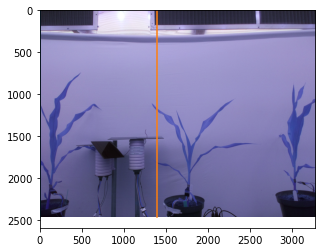

Please evaluate the FIRST cut, if good hit 'Y' if not good type the new threshold and then enter.1000
Current thr: [1000, 1400] for idx: 0


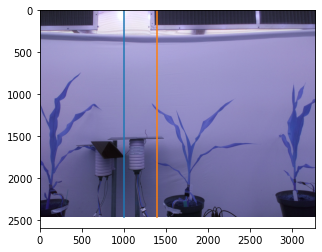

Please evaluate the FIRST cut, if good hit 'Y' if not good type the new threshold and then enter.0
Current thr: [0, 1400] for idx: 0


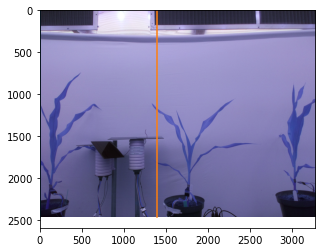

Please evaluate the FIRST cut, if good hit 'Y' if not good type the new threshold and then enter.y
Current thr: [0, 1400] for idx: 0


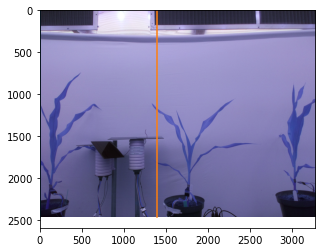

Please evaluate the SECOND cut, if good hit 'Y' if not good type the new threshold and then enter. (Max: 3280): 1000
Current thr: [0, 1000] for idx: 0


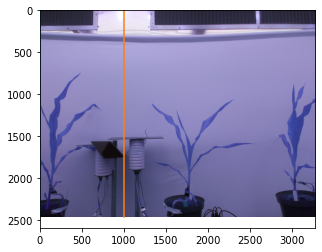

Please evaluate the SECOND cut, if good hit 'Y' if not good type the new threshold and then enter. (Max: 3280): 980
Current thr: [0, 980] for idx: 0


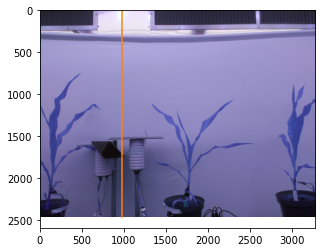

Please evaluate the SECOND cut, if good hit 'Y' if not good type the new threshold and then enter. (Max: 3280): 900
Current thr: [0, 900] for idx: 0


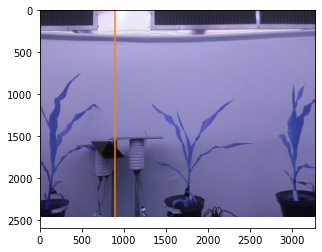

Please evaluate the SECOND cut, if good hit 'Y' if not good type the new threshold and then enter. (Max: 3280): 800
Current thr: [0, 800] for idx: 0


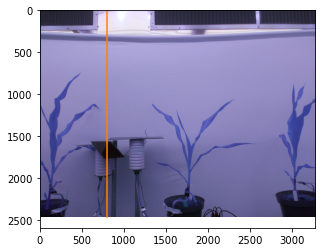

Please evaluate the SECOND cut, if good hit 'Y' if not good type the new threshold and then enter. (Max: 3280): y
Creating patches ... 
Value was changed!
Pair: [58, 116]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			Plant1!!!!!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			New Pair Now!!!!!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Current thr: [0, 742] for idx: 58


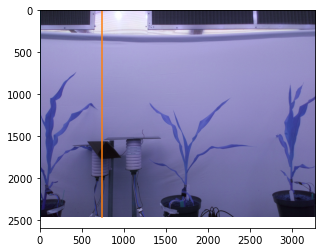

Please evaluate the FIRST cut, if good hit 'Y' if not good type the new threshold and then enter.y
Current thr: [0, 742] for idx: 58


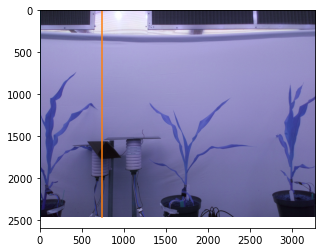

Please evaluate the SECOND cut, if good hit 'Y' if not good type the new threshold and then enter. (Max: 3280): y
Creating patches ... 
Pair: [116, 174]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			Plant1!!!!!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			New Pair Now!!!!!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Current thr: [0, 684] for idx: 116


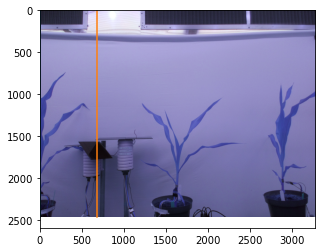

Please evaluate the FIRST cut, if good hit 'Y' if not good type the new threshold and then enter.y
Current thr: [0, 684] for idx: 116


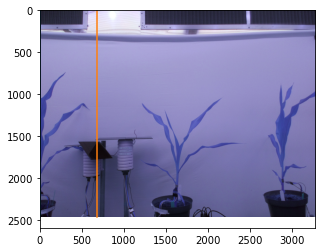

Please evaluate the SECOND cut, if good hit 'Y' if not good type the new threshold and then enter. (Max: 3280): y
Creating patches ... 
Pair: [174, 232]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			Plant1!!!!!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
			New Pair Now!!!!!
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Current thr: [0, 626] for idx: 174


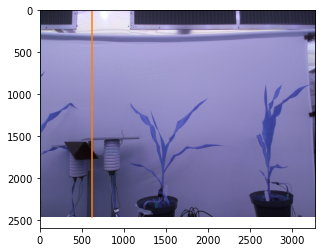

In [ ]:
cut_images()

### Save a dictionary with previous threshold values (recommended saving per scan)

In [ ]:
with open(os.path.join(dst_path.replace('Patches', 'NormalizedImages').replace(os.sep + plant + os.sep, os.sep), 'dictionary_plants_thr.json'), 'w') as fp:
    json.dump(dict_imidx_thrs, fp)

In [ ]:
### Load a dictionary with previous threshold values

In [ ]:
with open(os.path.join(dst_path.replace('Patches', 'NormalizedImages').replace(os.sep + plant + os.sep, os.sep), 'dictionary_plants_thr.json'), 'r') as fp:
    dict_imidx_thrs = json.load(fp)